# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Data Loading

In [2]:
data = pd.read_csv("d:/uber-taxi-demand/data/yellow_tripdata_2022.csv")
data.head()

,tpep_pickup_datetime,passenger_count,VendorID
0,2022-01-01 00:00:00,6838,4261
1,2022-01-01 01:00:00,7738,4997
2,2022-01-01 02:00:00,5974,3901
3,2022-01-01 03:00:00,4107,2686
4,2022-01-01 04:00:00,2485,1651


In [3]:
data.shape

(21624, 3)

In [4]:
data.tail()

,tpep_pickup_datetime,passenger_count,VendorID
21619,2022-12-31 19:00:00,8584,5730
21620,2022-12-31 20:00:00,9419,6210
21621,2022-12-31 21:00:00,9081,5962
21622,2022-12-31 22:00:00,6732,4350
21623,2022-12-31 23:00:00,4873,3273


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21624 entries, 0 to 21623
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tpep_pickup_datetime  21624 non-null  object
 1   passenger_count       21624 non-null  int64 
 2   VendorID              21624 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 506.9+ KB


In [6]:
df = data.copy()

In [7]:
###
df['timestamp'] = pd.to_datetime(df.tpep_pickup_datetime)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21624 entries, 0 to 21623
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tpep_pickup_datetime  21624 non-null  object        
 1   passenger_count       21624 non-null  int64         
 2   VendorID              21624 non-null  int64         
 3   timestamp             21624 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 675.9+ KB


In [9]:
###
df.drop(columns=['tpep_pickup_datetime'], inplace=True)

In [10]:
###
df.sort_values('timestamp', inplace=True)

In [11]:
df

,passenger_count,VendorID,timestamp
0,6838,4261,2022-01-01 00:00:00
1,7738,4997,2022-01-01 01:00:00
2,5974,3901,2022-01-01 02:00:00
3,4107,2686,2022-01-01 03:00:00
4,2485,1651,2022-01-01 04:00:00
...,...,...,...
17136,0,0,2023-04-18 10:00:00
17137,0,0,2023-04-18 11:00:00
17138,0,0,2023-04-18 12:00:00
17139,0,0,2023-04-18 13:00:00


# Checking Duplicates

In [12]:
# Check for duplicate values
value_counts  = df.duplicated(subset='timestamp').value_counts()
print(value_counts )

False    11343
True     10281
Name: count, dtype: int64


### As we can see there is 10281 duplicates values we have to remove it

# Droping Duplicates

In [13]:
###
df.drop_duplicates(subset='timestamp', inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(11343, 3)

In [16]:
###
df = df[~(df.timestamp > pd.Timestamp('2022-12-31 00:00:00'))]
df

,passenger_count,VendorID,timestamp
0,6838,4261,2022-01-01 00:00:00
1,7738,4997,2022-01-01 01:00:00
2,5974,3901,2022-01-01 02:00:00
3,4107,2686,2022-01-01 03:00:00
4,2485,1651,2022-01-01 04:00:00
...,...,...,...
14530,0,0,2022-12-30 20:00:00
14531,0,0,2022-12-30 21:00:00
21598,7092,4547,2022-12-30 22:00:00
21599,6589,4336,2022-12-30 23:00:00


# Handling Missing Values
- Detect
- Remove or Drop
- Filtering
- if the data is categorical then we have to use "Mode"
- if data is numerical, we have to use "mean", and "median".

# Detect Missing values

In [17]:
df.isnull()

,passenger_count,VendorID,timestamp
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
14530,False,False,False
14531,False,False,False
21598,False,False,False
21599,False,False,False


In [18]:
df.isnull().sum()

passenger_count    0
VendorID           0
timestamp          0
dtype: int64

In [19]:
df.isnull().sum().value_counts()

0    3
Name: count, dtype: int64

In [20]:
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
14530    0
14531    0
21598    0
21599    0
21600    0
Length: 8737, dtype: int64

In [21]:
df.isnull().sum(axis=1).value_counts()

0    8737
Name: count, dtype: int64

### There is no Missing Value

## Handling Outliers
- Ways to handle
    - Detect Outliers
    - Dropping outliers
    - Imputation - Median
    - Quantile-based flooring and capping
    - Transformations - Log transformation can help to reduce the effect of outliers
- if the data is categorical then we have to use "Mode"
- if data is numerical, we have to use "mean", and "median".
- IsolationForest
- pyod

# Detect Outliers

<Axes: xlabel='passenger_count'>

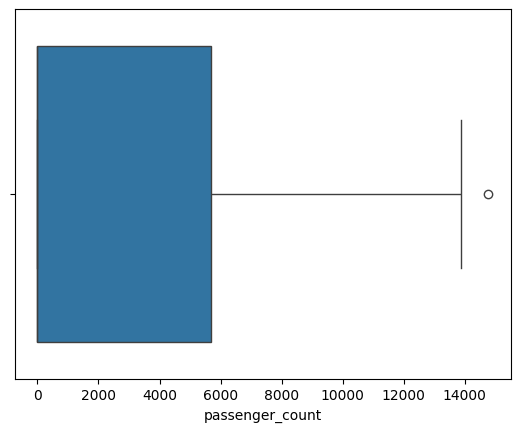

In [22]:
sns.boxplot(data = data, x = "passenger_count")

<Axes: xlabel='passenger_count'>

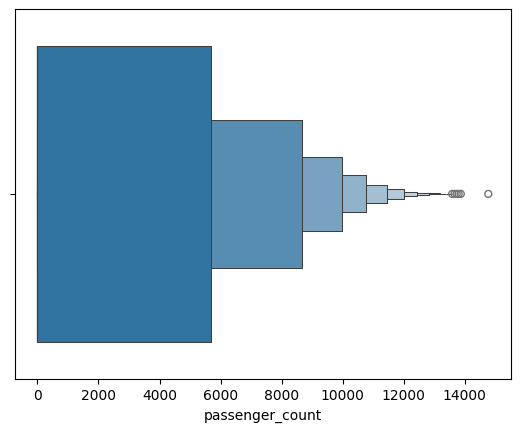

In [23]:
sns.boxenplot(data = data, x = "passenger_count")

<Axes: xlabel='passenger_count'>

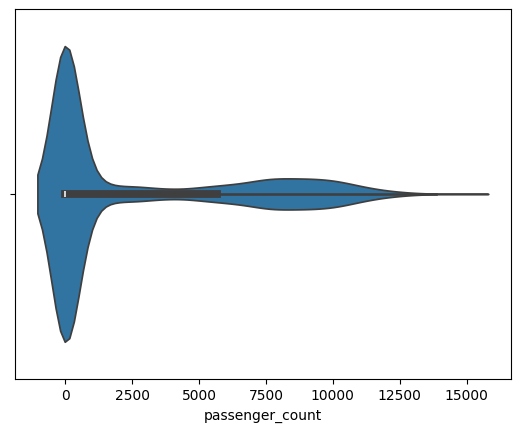

In [24]:
sns.violinplot(data = data, x = "passenger_count")

<Axes: xlabel='VendorID'>

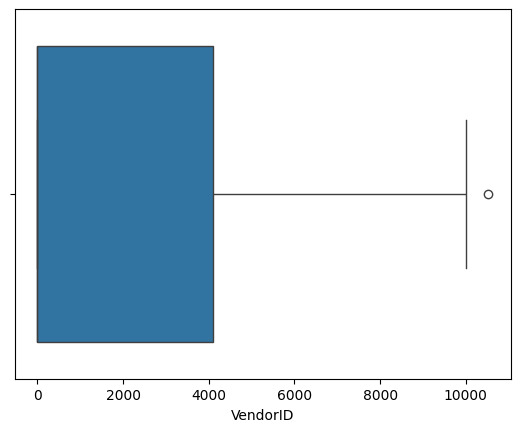

In [25]:
sns.boxplot(data = data, x = "VendorID")

<Axes: xlabel='VendorID'>

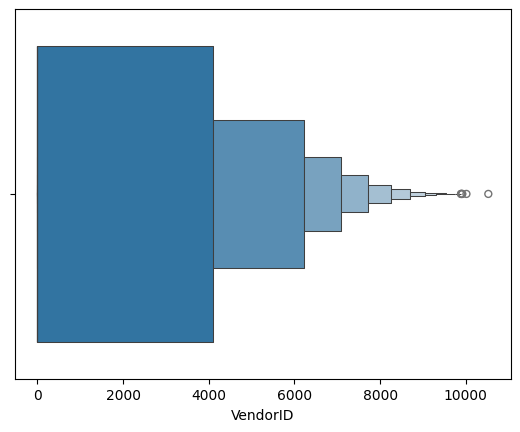

In [26]:
sns.boxenplot(data = data, x = "VendorID")

<Axes: xlabel='VendorID'>

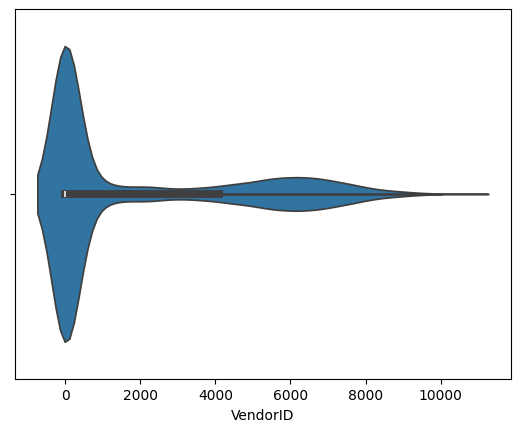

In [27]:
sns.violinplot(data = data, x = "VendorID")

### There is no outliers in "VendorID" and "passenger_count"

**Formatting**

In [28]:
df = df.rename({'passenger_count':'passengerDemand', 'VendorID': 'taxiDemand'}, axis=1)

In [29]:
df

,passengerDemand,taxiDemand,timestamp
0,6838,4261,2022-01-01 00:00:00
1,7738,4997,2022-01-01 01:00:00
2,5974,3901,2022-01-01 02:00:00
3,4107,2686,2022-01-01 03:00:00
4,2485,1651,2022-01-01 04:00:00
...,...,...,...
14530,0,0,2022-12-30 20:00:00
14531,0,0,2022-12-30 21:00:00
21598,7092,4547,2022-12-30 22:00:00
21599,6589,4336,2022-12-30 23:00:00


In [30]:
df.to_parquet('d:/uber-taxi-demand/data/yellow_trip_v2.parquet', index=False)